In [1]:
# Loading the data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set_context("talk")
sns.set_style("whitegrid")
%matplotlib inline

## Getting the Data

Here we start by importing a Python package called `requests`. You'll see this package described in more detail in future lessons, but for now all you need to know is that it allows us to fetch data over the internet!

We'll use it to pull the transcript of Macbeth from the Project Gutenberg website, specifically [this page](https://www.gutenberg.org/cache/epub/2264/pg2264.txt). We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 103,605 characters - the first 500 of which are printed below.

In [2]:
response = requests.get('https://www.gutenberg.org/cache/epub/2264/pg2264.txt')
full_text = response.text

# The beginning describes the source/copyright, it isn't the actual text
# of the play until the 16648th character
macbeth = full_text[16648:]

# Print string summary
print("Data type:", type(macbeth))
print()
print("Number of characters:", len(macbeth))
print()
print("First 500 characters:")
print(macbeth[:500])

Data type: <class 'str'>

Number of characters: 110679

First 500 characters:
o ouertake thee. Would thou hadst lesse deseru'd,
That the proportion both of thanks, and payment,
Might haue beene mine: onely I haue left to say,
More is thy due, then more then all can pay

   Macb. The seruice, and the loyaltie I owe,
In doing it, payes it selfe.
Your Highnesse part, is to receiue our Duties:
And our Duties are to your Throne, and State,
Children, and Seruants; which doe but what they should,
By doing euery thing safe toward your Loue
And Honor

   King. Welcome


## Word Count Summary

Create a variable `word_count` that is an integer representing the total count of words in `macbeth`. In order to do this, first create a variable `words_raw` that is a list containing all words in the string.

In [3]:
words_raw = macbeth.split()
word_count = len(words_raw)

print("Macbeth contains {} words".format(word_count))
print("Here are some examples:", words_raw[11:21])

Macbeth contains 18679 words
Here are some examples: ['both', 'of', 'thanks,', 'and', 'payment,', 'Might', 'haue', 'beene', 'mine:', 'onely']


## Unique Word Count

Create a variable `unique_word_count` that is an integer representing the count of unique words in Macbeth.

In order to create an accurate count, first create a variable `words_cleaned` that contains each word stripped of punctuation and made lowercase. Then assign `unique_word_count` to the count of words in `words_cleaned`.

In [4]:
import string
punctuation = string.punctuation

words_cleaned = []

for word in words_raw:
    # Remove punctuation
    word = word.strip(punctuation)
    # Make lowercase
    word = word.lower()
    # Append to words_cleaned
    words_cleaned.append(word)

print("Cleaned word examples:", words_cleaned[11:21])

Cleaned word examples: ['both', 'of', 'thanks', 'and', 'payment', 'might', 'haue', 'beene', 'mine', 'onely']


In [5]:
# Use set() to only include unique words
unique_word_count = len(set(words_cleaned))

print("Macbeth contains {} unique words".format(unique_word_count))

Macbeth contains 3823 unique words


## Frequency Table

Now that we have a general sense of how *many* words there are, let's investigate how *frequently* each of those words appears in the dataset. Build a frequency table called `word_counts` where the keys are the words (strings) and the values are the number of times that string appears. Then set `most_frequent_word` to the word that occurs most frequently and `least_frequent_word` to the word that occurs least frequently.

The general algorithm for building a frequency table is:

1. Initialize an empty dictionary (`word_counts`)
2. Loop over every element in the collection (`words_cleaned`) and add to the dictionary
    - If the element is not already in the dictionary keys, add a new key-value pair with the value 1
    - If the element is already in the dictionary keys, add 1 to the associated value

In [6]:
word_counts = {}

for word in words_cleaned:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

print(type(word_counts))
print(len(word_counts))

<class 'dict'>
3823


In [7]:
max_frequency = max(word_counts.values())
min_frequency = min(word_counts.values())

most_frequent_word = None
least_frequent_word = None

for word, frequency in word_counts.items():
    if frequency == max_frequency:
        most_frequent_word = word
    elif frequency == min_frequency:
        least_frequent_word = word

print("The most frequent word in Macbeth is '{}', which appears {} times".format(
    most_frequent_word, word_counts[most_frequent_word]
))
print("The least frequent word in Macbeth is '{}', which appears {} times".format(
    least_frequent_word, word_counts[least_frequent_word]
))

The most frequent word in Macbeth is 'the', which appears 748 times
The least frequent word in Macbeth is 'hear', which appears 1 times


## Visualizations

### Histogram

At last, it's time for some visualizations! First, let's make a **histogram** to visualize the frequency distribution of all 3,577 words (i.e. the distribution of `word_counts.values()`). 

Details:

 - We recommend using Matplotlib for this, since it allows you to customize the figure size. A `figsize` of (15,5) will work well for this, since it has a "long tail". 100 bins is also a good number.
 - Make sure you include appropriate labels on the axes and the title
 - You can use any colors or styles that look good to you

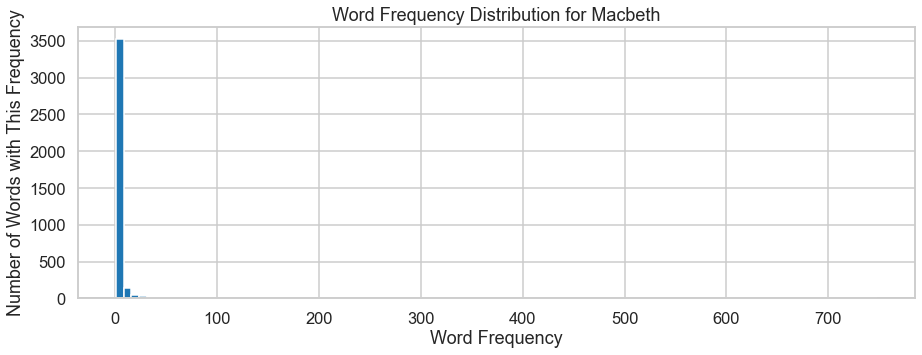

In [8]:
# Matplotlib version
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(word_counts.values(), bins=100)
ax.set_xlabel("Word Frequency")
ax.set_ylabel("Number of Words with This Frequency")
ax.set_title("Word Frequency Distribution for Macbeth");

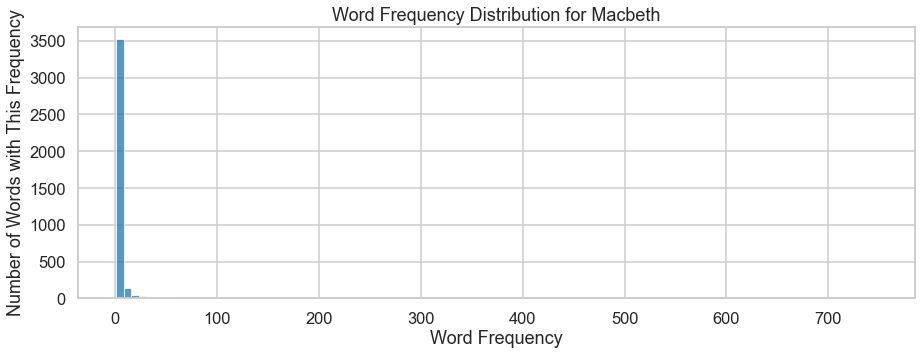

In [9]:
# Technically you can use Seaborn also but it requires making
# the figure and axes in Matplotlib first, otherwise you don't
# see any data drawn with the default width

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(
    word_counts.values(),
    bins=100,
    ax=ax, # telling it to plot using the axes already created  
    legend=False # seaborn has a legend by default but I don't think it's useful here
).set(
    xlabel="Word Frequency", 
    ylabel="Number of Words with This Frequency", 
    title="Word Frequency Distribution for Macbeth"
);

### Bar Graph

Let's move on to making a bar graph of the most frequent words, to gain more insight into that end of the distribution's "tail". To do this, we need to sort the contents of `word_counts` by value, and then select only the top 25 key-value pairs.

In [10]:
counts_list = list(word_counts.items())

# Sort the list of tuples by the frequency (second element in each tuple)
# Make sure it goes from most to least frequent
counts_list_sorted = sorted(counts_list, key = lambda item: item[1], reverse=True)

# Slice the sorted list to just the first 25 tuples
top_25 = counts_list_sorted[:25]

# Make a list of dummy numbers to populate the axis
ticks = np.arange(25)

# Get just the words from top_25 and assign to labels
# Get just the frequencies from top_25 and assign to frequencies
labels = []
frequencies = []
for word, frequency in top_25:
    labels.append(word)
    frequencies.append(frequency)
    
# ^ Alternatively you could use list comprehension:
# labels = [item[0] for item in top_25]
# frequencies = [item[1] for item in top_25]

print("Tick values:", ticks)
print()
print("Labels:", labels)
print()
print("Frequencies:", frequencies)

Tick values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Labels: ['the', 'and', 'to', 'of', 'i', 'a', 'you', 'in', 'that', 'my', 'is', 'not', 'with', 'it', 'this', 'be', 'for', 'macb', 'your', 'his', 'our', 'haue', 'but', 'all', 'or']

Frequencies: [748, 548, 423, 409, 309, 272, 252, 235, 211, 190, 188, 177, 177, 164, 141, 139, 128, 125, 125, 124, 116, 114, 112, 104, 101]


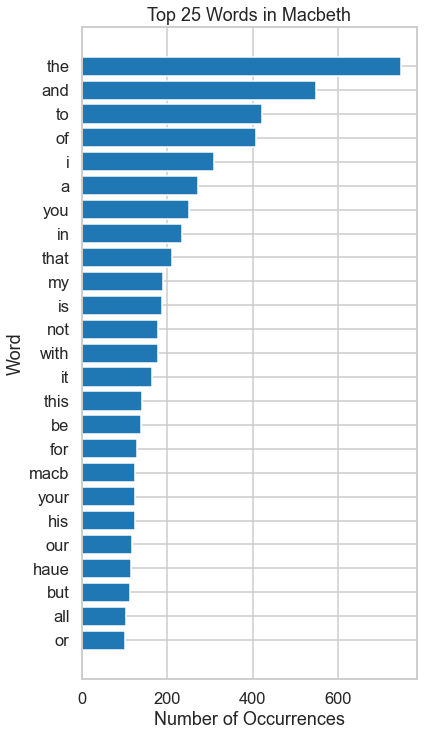

In [11]:
# Matplotlib version

# You don't have to reverse the order, I just think it looks better
# for the largest to be at the top rather than closest to the x-axis
# (the default behavior)
frequencies_reversed = frequencies[::-1]
labels_reversed = labels[::-1]

fig, ax = plt.subplots(figsize=(6, 12))
ax.barh(ticks, frequencies_reversed)

# You have to set both the ticks themselves and the labels
# The ticks make it so there are fully 25 ticks, not just 6
ax.set_yticks(ticks)
# The labels put the words next to the tick marks
ax.set_yticklabels(labels_reversed)

ax.set_ylabel("Word")
ax.set_xlabel("Number of Occurrences")
ax.set_title("Top 25 Words in Macbeth");

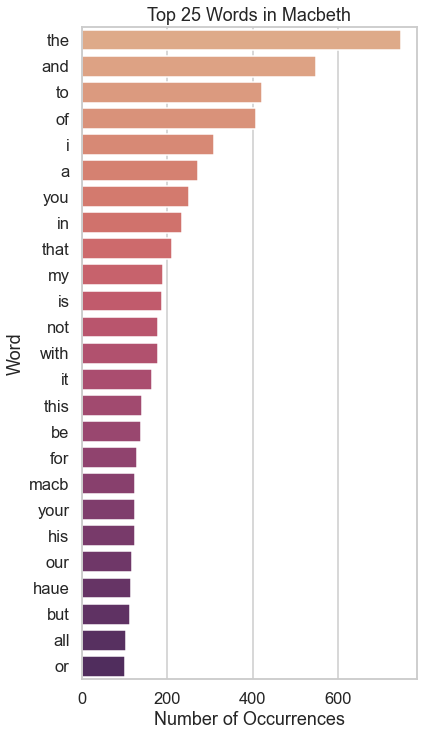

In [12]:
# Seaborn version

# Seaborn automatically puts the largest at the top, so you
# don't need to create reversed versions

# Text overlaps if you use the default width, so start with
# Matplotlib fig and ax
fig, ax = plt.subplots(figsize=(6, 12))

sns.barplot(
    x=frequencies, 
    y=ticks, 
    orient="h",
    ax=ax, # telling it to plot using the axes already created  
    palette="flare" # set a sequential colormap
).set(
    yticklabels=labels,
    ylabel="Word",
    xlabel="Number of Occurrences", 
    title="Top 25 Words in Macbeth"
);